In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q matplotlib

#

In [ ]:
def editing(name, data, c):
    keypoints = data['people'][name]
    x_coords = []
    y_coords = []
    for i, point in enumerate(keypoints):
      if i % 3 == 0 and (i//3) in c:x_coords.append(point)
      elif i % 3 == 1 and (i//3) in c:y_coords.append(point)
    ret={}
    ret['x']=x_coords
    ret['y']=y_coords
    return ret


In [ ]:
#전처리 코드
import os
from glob import *
import json

if os.path.isdir('/content/drive/MyDrive/전처리')==False:os.mkdir('/content/drive/MyDrive/전처리') #전처리 과정을 거친(용량 1/10) 디렉토리 생성
hand_edit=[0,3,5,7,9,11,13,15,17,19]
pose_edit=[1,2,3,4,5,6,7]
face_edit=[17,19,21,22,24,26,28,30,31,33,35,36,37,39,42,44,45,48,51,54,57]

folder_path='/content/drive/MyDrive/keypoint/18'
directory_list = sorted(glob(os.path.join(folder_path, '*/')))

for dir in directory_list:
  file_list=sorted(glob(os.path.join(dir, 'NIA_SL_FS0???_CROWD18_F_000000000???_keypoints.json')))
  edit_dir='/content/drive/MyDrive/전처리/'+dir.split('/')[-2]+'/'
  if os.path.isdir(edit_dir)==False:os.mkdir(edit_dir)
  for _file in file_list:
    with open(_file, 'r') as f:
      try:
        data=json.load(f)
      except json.JSONDecodeError:
        print(f"오류가 있는 파일: {_file}") # 오류가 있는 파일 이름 출력
        continue # 다음 파일로 넘어감
    __hand_left=editing('hand_left_keypoints_2d', data, hand_edit)
    __hand_right=editing('hand_right_keypoints_2d', data, hand_edit)
    __pose=editing('pose_keypoints_2d', data, pose_edit)
    __face=editing('face_keypoints_2d', data, face_edit)
    edit={'hand_left':__hand_left, 'hand_right':__hand_right, 'pose':__pose, 'face':__face}
    with open(edit_dir+os.path.basename(_file), 'w') as f:
      json.dump(edit, f)


#'NIA_SL_FS0053_CROWD18_F_000000000478_keypoints.json'
#/content/drive/MyDrive/전처리/NIA_SL_FS0001_CROWD18_F

오류가 있는 파일: /content/drive/MyDrive/keypoint/18/NIA_SL_FS0002_CROWD18_F/NIA_SL_FS0002_CROWD18_F_000000000006_keypoints.json


In [ ]:
path1='/content/drive/MyDrive/keypoint/18/NIA_SL_FS0066_CROWD18_F/'
path3=path1.split('/')[-2]
print(path3)

NIA_SL_FS0066_CROWD18_F


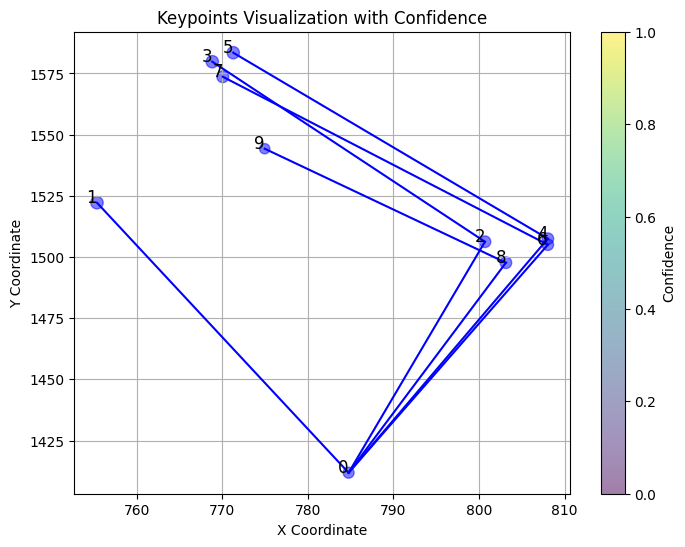

In [ ]:
import json
import matplotlib.pyplot as plt

json_file_path = '/content/NIA_SL_FS0001_CROWD18_F_000000000000_keypoints.json'
c=[0,3,5,7,9,11,13,15,17,19]

with open(json_file_path, 'r') as f:
    data = json.load(f)
#left hand processing
keypoints = data['people']['hand_left_keypoints_2d']

x_coords = []
y_coords = []
confidence = []


# 키포인트 좌표 리스트 생성
for i, point in enumerate(keypoints):
    if i % 3 == 0 and (i//3) in c:x_coords.append(point)
    elif i % 3 == 1 and (i//3) in c:y_coords.append(point)
    elif i % 3 == 2 and (i//3) in c:confidence.append(point)

connections = [
    (0,1), #엄지
    (0,2), (2,3), #검지
    (0,4), (4,5), #중지
    (0,6), (6,7), #약지
    (0,8), (8,9) #소지
]

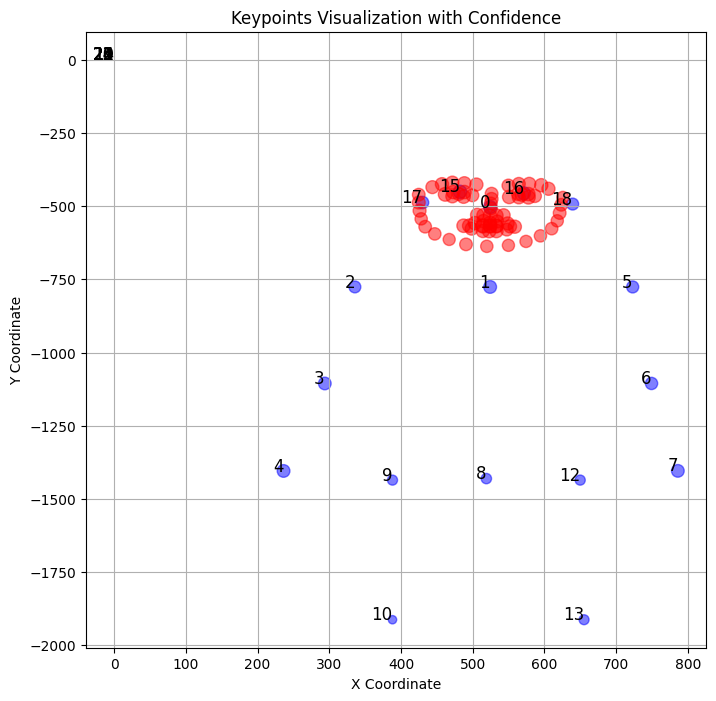

In [ ]:
import json
import matplotlib.pyplot as plt

json_file_path = '/content/NIA_SL_FS0001_CROWD18_F_000000000000_keypoints.json'

with open(json_file_path, 'r') as f:
    data = json.load(f)

pose_keypoints = data['people']['pose_keypoints_2d']
face_keypoints = data['people']['face_keypoints_2d']

pose_x_coords = []
pose_y_coords = []
pose_confidence = []
face_x_coords = []
face_y_coords = []
face_confidence = []

# 포스 키포인트 좌표 리스트 생성
for i, point in enumerate(pose_keypoints):
    if i % 3 == 0:pose_x_coords.append(point)
    elif i % 3 == 1:pose_y_coords.append(-point)
    elif i % 3 == 2:pose_confidence.append(point)

# 페이스 키포인트 좌표 리스트 생성
for i, point in enumerate(face_keypoints):
    if i % 3 == 0:face_x_coords.append(point)
    elif i % 3 == 1:face_y_coords.append(-point)
    elif i % 3 == 2:face_confidence.append(point)




hand_connections = [
    (0,1),(1,2),(2,3),(3,4), #엄지
    (0,5),(5,6),(6,7),(7,8), #검지
    (0,9), (9,10),(10,11),(11,12), #중지
    (0,13),(14,15),(15,16), #약지
    (0,17), (17,18),(18,19),(19,20) #소지
]
pose_connections = [
    (0, 1), (1, 2), (2, 3), (3, 4), (5, 6), (6,7), # 몸통
    (0,5), (1, 8), (8, 9), (9, 10),  # 왼팔
    (1, 12), (12, 13),    # 오른팔
    (0, 16), (16, 17), (17, 18),  # 왼다리
    (22, 23)  # 오른다리
]



# 이미지 크기 설정
fig, ax = plt.subplots(figsize=(8, 8))

# 키포인트 시각화 (confidence 값에 따라 크기 조절)
scatter1 = ax.scatter(pose_x_coords, pose_y_coords, c='blue', s=[c * 100 for c in pose_confidence], alpha=0.5)
scatter2 = ax.scatter(face_x_coords, face_y_coords, c='red', s=[c * 100 for c in face_confidence], alpha=0.5)

for idx, (x, y) in enumerate(zip(pose_x_coords, pose_y_coords)):
    ax.text(x, y, str(idx), fontsize=12, ha='right')
# for idx, (x, y) in enumerate(zip(face_x_coords, face_y_coords)):
#     ax.text(x, y, str(idx), fontsize=12, ha='right')

# # 간선 연결
# for connection in pose_connections:
#     start_idx, end_idx = connection
#     ax.plot([x_coords[start_idx], x_coords[end_idx]], [y_coords[start_idx], y_coords[end_idx]], 'b-')

# x_ticks = range(0, 900, 100)  # 예: 100 단위로 x축 그리드 설정
# y_ticks = range(-2000, -250, 100)  # 예: 100 단위로 y축 그리드 설정
# ax.set_xticks(x_ticks)
# ax.set_yticks(y_ticks)

# 그래프 설정
ax.set_title('Keypoints Visualization with Confidence')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.grid(True)

# # 색상 바 표시 (confidence 값에 따른 색상 차이)
# plt.colorbar(scatter, ax=ax, label='Confidence')

# 그래프 표시
plt.show()
